Title: Regression Models

Linear Regression (Simple & Multiple)

Task 1: Differentiate between a labeled dataset of image classifications and an unlabeled dataset for clustering customer segments.

Accuracy: 97.41%


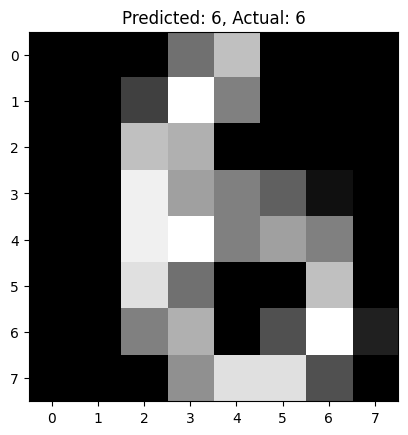

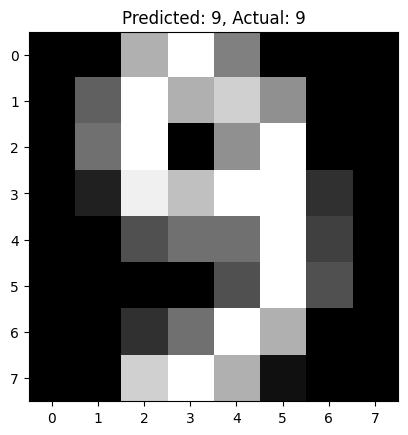

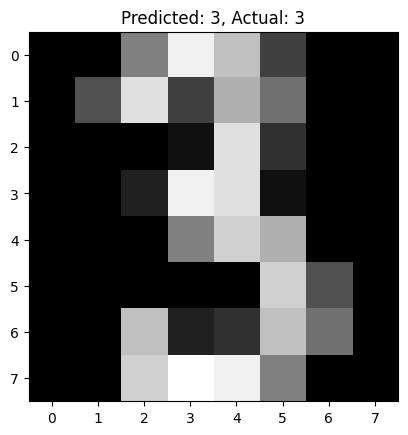

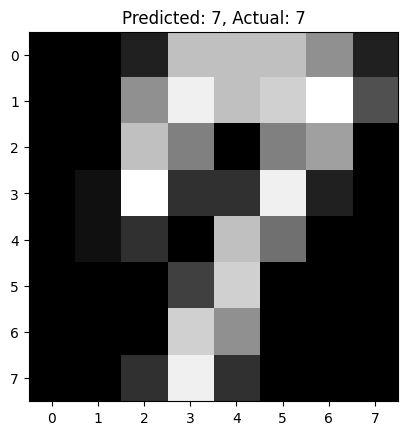

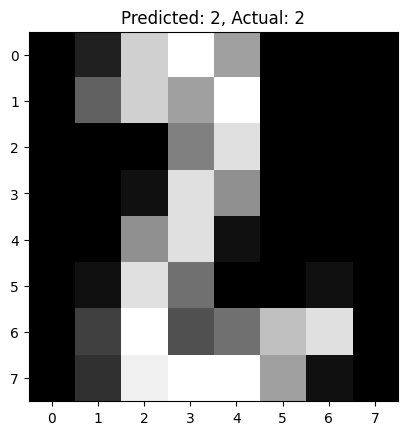

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load a sample image dataset (digits dataset for simplicity)
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))  # Flatten the images
y = digits.target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a classifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = classifier.predict(X_test)

# Step 5: Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Step 6: Display some sample images and predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')
    plt.show()


Task 2: Examine a problem statement and determine which learning type is applicable.<br>

In [2]:
def determine_learning_type(problem_statement):
    # Lowercase for easier comparison
    problem_statement = problem_statement.lower()

    # Check if the problem statement suggests supervised learning
    if "predict" in problem_statement and ("label" in problem_statement or "class" in problem_statement):
        return "Supervised Learning"
    
    # Check if the problem statement suggests unsupervised learning
    elif "group" in problem_statement or "cluster" in problem_statement:
        return "Unsupervised Learning"
    
    # Check if the problem statement suggests reinforcement learning
    elif "maximize" in problem_statement and ("reward" in problem_statement or "action" in problem_statement):
        return "Reinforcement Learning"
    
    # Check if the problem statement suggests semi-supervised learning
    elif "small labeled data" in problem_statement and "large unlabeled data" in problem_statement:
        return "Semi-supervised Learning"
    
    # Default case when the learning type can't be easily identified
    else:
        return "Learning Type Not Identified"

# Example Problem Statements
problem_statements = [
    "We want to predict whether a student will pass or fail an exam based on their study hours, class participation, and previous scores.",
    "We want to group customers based on their shopping behaviors without any predefined categories.",
    "We want to train a robot to navigate a maze and maximize its rewards based on its actions (moving left, right, up, down).",
    "We have a set of unlabeled emails and a small set of labeled emails, and we want to classify new emails as either spam or not spam."
]

# Determine the learning type for each problem
for problem in problem_statements:
    learning_type = determine_learning_type(problem)
    print(f"Problem: {problem}\nLearning Type: {learning_type}\n")


Problem: We want to predict whether a student will pass or fail an exam based on their study hours, class participation, and previous scores.
Learning Type: Supervised Learning

Problem: We want to group customers based on their shopping behaviors without any predefined categories.
Learning Type: Unsupervised Learning

Problem: We want to train a robot to navigate a maze and maximize its rewards based on its actions (moving left, right, up, down).
Learning Type: Reinforcement Learning

Problem: We have a set of unlabeled emails and a small set of labeled emails, and we want to classify new emails as either spam or not spam.
Learning Type: Learning Type Not Identified



Task 3: Identify whether facial recognition systems use supervised or unsupervised learning and justify.

In [12]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image

# Step 1: Load and Preprocess the Dataset
# We will use the olivetti faces dataset from sklearn
def load_olivetti_faces():
    # Fetch the Olivetti faces dataset
    dataset = fetch_olivetti_faces(shuffle=True, random_state=42)
    faces = dataset.images  # Shape (400, 64, 64) - 400 images of 64x64 pixels
    labels = dataset.target  # Corresponding labels (person IDs)
    
    return faces, labels

# Step 2: Feature extraction - Resize faces (already 64x64, so no resizing required)
def extract_features(faces):
    # Resize faces to a standard size (in this case, it's already 64x64)
    # You can add other feature extraction techniques if needed
    resized_faces = [Image.fromarray(face).resize((100, 100)) for face in faces]
    resized_faces = [np.array(face) for face in resized_faces]
    return resized_faces

# Step 3: Load Dataset and Extract Features
faces, labels = load_olivetti_faces()

# Convert faces list to numpy array and flatten each image into a 1D vector
faces = np.array(faces)
faces = faces.reshape(faces.shape[0], -1)  # Flatten images into 1D vectors

# Labels are already in the correct format
y = np.array(labels)

# Step 4: Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(faces, y, test_size=0.3, random_state=42)

# Step 5: Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 6: Make Predictions and Evaluate Model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Step 7: Test with a new image (Predict the label of a new face image)
# Let's use an image from the test set as an example
test_img = X_test[0].reshape(1, -1)  # Just use the first test image for demonstration
predicted_label = knn.predict(test_img)

# Print the predicted label
print(f"Predicted Label: {predicted_label[0]}")


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/vscode/scikit_learn_data


Accuracy: 82.50%
Predicted Label: 18
